### Import Libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import sklearn

from sklearn.preprocessing import FunctionTransformer, LabelEncoder, OneHotEncoder
import sklearn_pandas
from scipy import stats


import csv

### Load train and test data:

In [4]:
train_data = pd.read_csv("C:/Users/HP/Downloads/house-prices-advanced-regression-techniques/train.csv")

test_data = pd.read_csv("C:/Users/HP/Downloads/house-prices-advanced-regression-techniques/test.csv")

### Data analysis:

In [12]:
type(train_data)

pandas.core.frame.DataFrame

In [5]:
test_data.shape

(1459, 80)

In [6]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

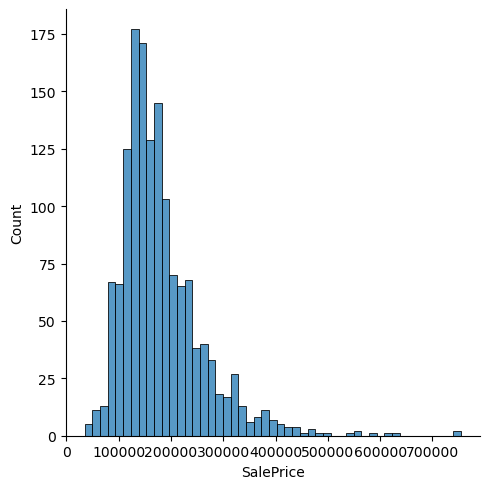

In [7]:
sns.displot(train_data['SalePrice']) # skewed

In [15]:
# removing columns:

train_data = train_data.drop("Id", axis=1)
test_data = test_data.drop("Id", axis=1)

In [16]:
train_data = train_data.drop(['Street', 'Utilities'], axis=1, inplace=True)
test_data = test_data.drop(['Street', 'Utilities'], axis=1, inplace=True)

In [19]:
# checking nan values

col_nan = train_data.isna().sum() / train_data.shape[0]

Text(0.5, 1.0, 'Features with the highest percentage of Nan values')

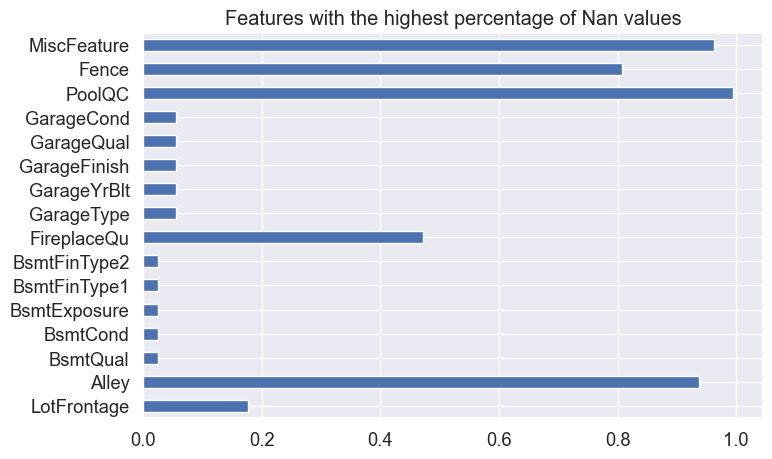

In [20]:
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.2)
col_nan[col_nan > 0.01].plot(kind = "barh")
plt.title("Features with the highest percentage of Nan values")

In [41]:
data= pd.concat((train_data, test_data)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)

In [42]:
#data = pd.concat([train_data.drop("SalePrice",axis=1),test_data])

In [43]:
# analyzing and imputing Nans:

train_data.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [44]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [45]:
# categorical:

fill_none = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageQual", "GarageFinish", "GarageType", "BsmtCond", "BsmtExposure", "BsmtQual", "BsmtFinType2", "BsmtFinType1"]

data[fill_none] = data[fill_none].fillna("None")

In [46]:
data[["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageQual", "GarageFinish", "GarageType", "BsmtCond", "BsmtExposure", "BsmtQual", "BsmtFinType2", "BsmtFinType1"]
].isnull().sum()

PoolQC          0
MiscFeature     0
Alley           0
Fence           0
FireplaceQu     0
GarageCond      0
GarageQual      0
GarageFinish    0
GarageType      0
BsmtCond        0
BsmtExposure    0
BsmtQual        0
BsmtFinType2    0
BsmtFinType1    0
dtype: int64

In [47]:
fill_mode = ["MasVnrType", "MSZoning",  "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "KitchenQual", "Functional"]

data[fill_mode] = data.groupby("Neighborhood")[fill_mode].transform(lambda x:x.fillna(x.mode()[0]))

In [48]:
data[["MasVnrType", "MSZoning",  "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "KitchenQual", "Functional"]].isnull().sum()

MasVnrType     0
MSZoning       0
Exterior1st    0
Exterior2nd    0
SaleType       0
Electrical     0
KitchenQual    0
Functional     0
dtype: int64

In [49]:
# numerical values:

fill_median = ["GarageArea", "LotFrontage"]

data[fill_median] = data.groupby("Neighborhood")[fill_median].transform(lambda x: x.fillna(x.median())) 

In [50]:
data[["GarageArea", "LotFrontage"]].isnull().sum()

GarageArea     0
LotFrontage    0
dtype: int64

In [51]:
fill_zero = ["GarageYrBlt", "MasVnrArea", "BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "GarageCars"]

data[fill_zero] = data[fill_zero].fillna(0)

In [52]:
data[["GarageYrBlt", "MasVnrArea", "BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "GarageCars"]].isnull().sum()

GarageYrBlt     0
MasVnrArea      0
BsmtHalfBath    0
BsmtFullBath    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
GarageCars      0
dtype: int64

In [53]:
# creating new columns to get total units, like total area:

data["Total_Porch"] = data["OpenPorchSF"] + data["EnclosedPorch"] + data["3SsnPorch"] + data["ScreenPorch"]
data["Total_Area"] = data["GrLivArea"] + data["TotalBsmtSF"]
data["Total_Baths"] = data["FullBath"] + data["BsmtFullBath"] + 0.5*(data["HalfBath"]+data["BsmtHalfBath"])


In [54]:
#for categorical features:

data['Pool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data['2ndFloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data['Garage'] = data['GarageCars'].apply(lambda x: 1 if x > 0 else 0)
data['Bsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data['Fireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
data['Porch'] = data['Total_Porch'].apply(lambda x: 1 if x > 0 else 0)

In [55]:
# one hot encoding:

data = pd.get_dummies(data) 
data.shape

(2919, 312)

In [56]:

# skew data


skewed = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'LowQualFinSF', 'MiscVal'
]

skew_features = np.abs(data[skewed].apply(lambda x: stats.skew(x)))



skew_features

LotFrontage       1.505704
LotArea          12.822431
MasVnrArea        2.613592
BsmtFinSF1        1.425230
BsmtFinSF2        4.146143
BsmtUnfSF         0.919339
TotalBsmtSF       1.156894
1stFlrSF          1.469604
2ndFlrSF          0.861675
GrLivArea         1.269358
GarageArea        0.241792
WoodDeckSF        1.842433
OpenPorchSF       2.535114
EnclosedPorch     4.003891
3SsnPorch        11.376065
ScreenPorch       3.946694
PoolArea         16.898328
LowQualFinSF     12.088761
MiscVal          21.947195
dtype: float64

In [57]:
high_skew = skew_features[skew_features > 0.5]
high_skew

LotFrontage       1.505704
LotArea          12.822431
MasVnrArea        2.613592
BsmtFinSF1        1.425230
BsmtFinSF2        4.146143
BsmtUnfSF         0.919339
TotalBsmtSF       1.156894
1stFlrSF          1.469604
2ndFlrSF          0.861675
GrLivArea         1.269358
WoodDeckSF        1.842433
OpenPorchSF       2.535114
EnclosedPorch     4.003891
3SsnPorch        11.376065
ScreenPorch       3.946694
PoolArea         16.898328
LowQualFinSF     12.088761
MiscVal          21.947195
dtype: float64

In [58]:
high_skew = np.log1p(high_skew)

In [59]:
high_skew #after log transformation

LotFrontage      0.918570
LotArea          2.626293
MasVnrArea       1.284702
BsmtFinSF1       0.885926
BsmtFinSF2       1.638248
BsmtUnfSF        0.651981
TotalBsmtSF      0.768669
1stFlrSF         0.904058
2ndFlrSF         0.621476
GrLivArea        0.819497
WoodDeckSF       1.044660
OpenPorchSF      1.262745
EnclosedPorch    1.610216
3SsnPorch        2.515764
ScreenPorch      1.598719
PoolArea         2.884707
LowQualFinSF     2.571754
MiscVal          3.133196
dtype: float64

In [5]:
y = np.log(train_data.loc[:,"SalePrice"])
y.shape



(1460,)

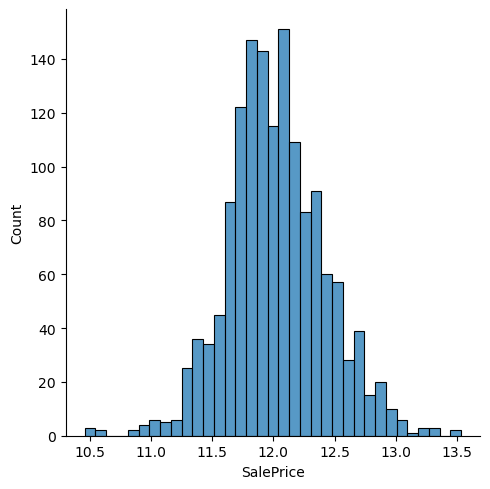

In [6]:
 sns.displot(y) # after log transformation

In [61]:
# below columns are of categorical type

data[["MSSubClass", "YrSold"]] = data[["MSSubClass", "YrSold"]].astype("str") 

### Model Fitting

In [62]:
ntrain = train_data.shape[0]
ntest = test_data.shape[0]

In [63]:
#X_train = data.iloc[:len(train_data),:]
#X_test = data.iloc[len(X_train):,:]
#print(len(X_test) == len(test_data))

In [64]:
train = data[:ntrain]
test = data[ntrain:]

In [65]:
train.shape

(1460, 312)

In [66]:
test.shape

(1459, 312)

In [67]:
data.shape

(2919, 312)

In [68]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=(0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10))
ridge_cv.fit(train, y)
ridge_cv_preds=ridge_cv.predict(test)

In [69]:
y_pred = ridge_cv_preds
y_pred

array([11.63734395, 11.91248932, 12.04309739, ..., 11.94635055,
       11.59314916, 12.30621105])

In [70]:
submit = {'Id': test.Id.values,'SalePrice': y_pred}
    
    

predictions = pd.DataFrame(submit)
predictions.head()

,Id,SalePrice
0,1461,11.637344
1,1462,11.912489
2,1463,12.043097
3,1464,12.174871
4,1465,12.173978


In [71]:
predictions.to_csv('predictions.csv',index=False)